# Data Mining - Handin 2 - Graph mining

This handin corresponds to the topics in Week 10-15 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Brightspace no later than **April 21 kl. 11.59PM**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **100**. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points on of the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).
Good luck!

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide **NO code**, but show the main steps to reach the result (not all).  
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

In [1]:
### BEGIN IMPORTS - DO NOT TOUCH!
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import sys
sys.path.append('..')
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install networkx
#!{sys.executable} -m pip install torchvision
import random
import scipy.io as sio
import time

import networkx as nx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import csv
from itertools import count


import torch
import torch.optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


from utilities.load_data import load_mnist
import utilities.email as email
from utilities.mnist import *

from utilities.make_graphs import read_edge_list, read_list, load_data

### END IMPORTS - DO NOT TOUCH!

c:\Users\Simon\Documents\dm2023-exercises\handins


## Task 1.1 Random walks and PageRank  (12 points)

In this exercise recall that the PageRank is defined as 

$$\mathbf{r} = \alpha \mathbf{Mr} + (1-\alpha)\mathbf{p}$$ 

where $\mathbf{r}\in \mathbb{R}^n$ is the PageRank vector, $\alpha$ is the restart probability, $\mathbf{M} = A\Delta^{-1}$, and $\mathbf{p}$ is the restart (or personalization) vector. 

**************************************
### Task 1.1.1 (4 points)
What is the PageRank of a **$d$-regular** graph with $n$ nodes and $\alpha=1$? 

<span style='color: green'>**\[Motivate\]**</span> your answer without showing the exact computation. 

*************************************
$\mathbf{r} = \alpha \mathbf{Mr} + (1-\alpha)\mathbf{p} = 1 \cdot \mathbf{Mr} + (1-1)\mathbf{p} = \mathbf{Mr} = \mathbf{A}\Delta^{-1}r$


The page rank is $\frac{1}{n}$ for all the nodes.

*************************************

### Task 1.1.2 (6 points)
Look at the graph below (run the code) and try make a guess about the PageRank values of each node only by reasoning on the graph's connections.

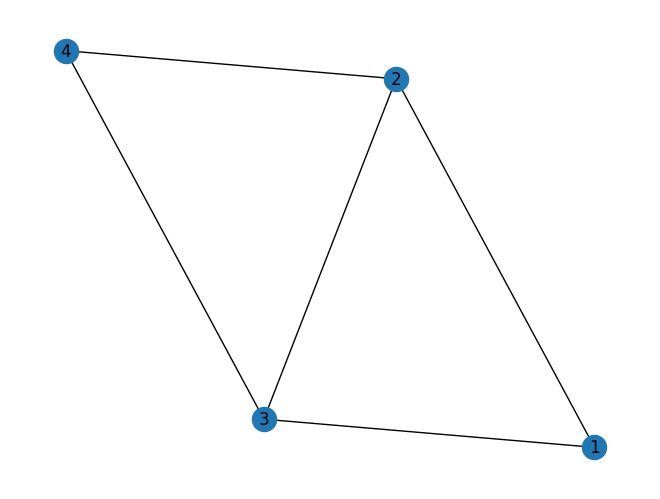

In [2]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3), (2,4), (3,4), (1,3)])
nx.draw(G, with_labels=True, )

1: 2/10
2: 3/10
3: 3/10
4: 2/10

<span style='color: green'>**A) \[Implement\]**</span> the PageRank for $\alpha=1$ for the graph using the Power Iteration method (use $\epsilon=1e-16$ to stop the iteration).<br> 

<span style='color: green'>**B) \[Implement\]**</span> Plot the norm square difference of the $r$ vector (between any two consecutive iterations) for each iteration.

<span style='color: green'>**C) \[Motivate\]**</span> Do you observe a constant decrease of the norm square difference as iterations are increasing, and is this decrease expected or not?

<span style='color: green'>**D) \[Implement\]**</span> the PageRank for $\alpha=1$ using the eigenvector method.<br> 

<span style='color: green'>**E) \[Motivate\]**</span> Are solutions of both methods the same? Why don't we only use the eigenvector method that optimally solves the problem? 

<span style='color: green'>**F) \[Motivate\]**</span> Do the real vector match with your first guess? Can you see a pattern between the pagerank score of each node and its edges?   

In [3]:
#A) YOUR CODE HERE 
# Implement pagerank algorithm given graph G and alpha using the power iteration method and use epsilon = 1e-16 as stopping criterion.
def pagerank(G, alpha):
    adjacency_matrix = nx.adjacency_matrix(G)
    adjacency_matrix = adjacency_matrix.todense()
    A = np.array(adjacency_matrix)
    r = np.ones(adjacency_matrix.shape[0])
    r = r / r.shape[0]

    Delta = [[np.sum(A[i]) if i == j else 0 for j in range(r.shape[0])] for i in range(r.shape[0])]
    Delta_inv = np.linalg.inv(Delta)
    M = A @ Delta_inv
    epsilon = 1e-16
    diff = 1
    while(diff > epsilon):
        r_s = r
        r = alpha * M @ r + (1 - alpha) / G.number_of_nodes()
        diff = np.linalg.norm(r - r_s)
    return r

print(pagerank(G, 1))

[0.2 0.3 0.3 0.2]


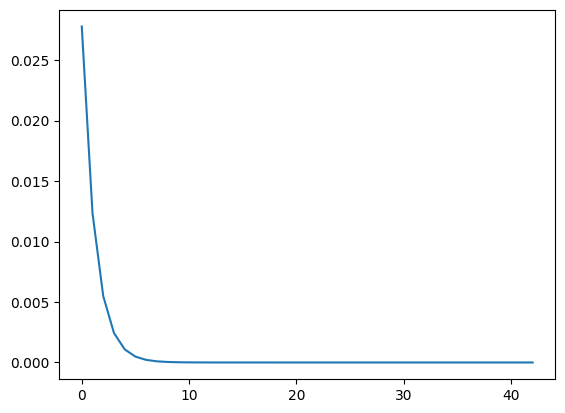

In [4]:
#B) YOUR CODE HERE 
# Plot the norm square difference of the $r$ vector (between any two consecutive iterations) for each iteration.
def pagerank_plot(G, alpha):
    adjacency_matrix = nx.adjacency_matrix(G)
    adjacency_matrix = adjacency_matrix.todense()
    A = np.array(adjacency_matrix)
    r = np.ones(adjacency_matrix.shape[0])
    r = r / r.shape[0]

    Delta = [[np.sum(A[i]) if i == j else 0 for j in range(r.shape[0])] for i in range(r.shape[0])]
    Delta_inv = np.linalg.inv(Delta)
    M = A @ Delta_inv
    epsilon = 1e-16
    diff = 1
    diff_list = []
    while(diff > epsilon):
        r_s = r
        r = alpha * M @ r + (1 - alpha) / G.number_of_nodes()
        diff = np.sum(pow(r - r_s, 2))
        diff_list.append(diff)
    return diff_list

diff_list = pagerank_plot(G, 1)
plt.plot(diff_list)
plt.show()


C)
Yes, the norm square difference is decreasing as iterations are increasing. This is expected because the norm square difference is the difference between the current r vector and the previous r vector. The difference should decrease as the r vector converges to the correct value.



In [5]:
#D) YOUR CODE HERE
# Implement the PageRank for $\alpha=1$ using the eigenvector method.
def pagerank_eigenvector(G, alpha=1):
    adjacency_matrix = nx.adjacency_matrix(G)
    adjacency_matrix = adjacency_matrix.todense()
    A = np.array(adjacency_matrix)
    n = A.shape[1]
    v = np.ones(n) / n
    M_hat = (alpha * A) + (((1 - alpha) / n) * np.ones((n, n)))

    eigvals, eigvecs = np.linalg.eig(M_hat.T)
    idx = np.argmax(eigvals)
    largest_eigenvector = np.real(eigvecs[:, idx])
    return largest_eigenvector / np.sum(largest_eigenvector)

print(pagerank_eigenvector(G))

[0.21922359 0.28077641 0.28077641 0.21922359]


E) No the output of the two methods differ. The first one will only have postive outputs, whereas pagerank with eigenvector does not neccesarily needs to output a positive value.
Also the eigenvector method is more accurate than the power iteration method. The power iteration method is not guaranteed to converge to the correct solution. The eigenvector method is guaranteed to converge to the correct solution.

 F) I think the real vector matches with my first guess. The pagerank score of each node is the same as the number of edges it has. The node with the most edges has the highest pagerank score.


### Task 1.1.3 (2 points)

<span style='color: green'>**\[Motivate\]**</span><br>

Assume you have embedded the graph in **1.1.2** with a __Linear Embedding__ using unormalized Laplacian matrix of the graph as the similarity matrix. How do you expect the embeddings to be if the embedding dimension is $d = 1$?
(1) Check the correct box below and (2) motivate your answer.

- [ ] Nodes 1, 2, 3, 4 will be placed in the corners of a hypercube
- [ ] Nodes 2,3 will have the same embedding while 1,4 will be far from each other.
- [x] Nodes 1,4 and 2,3 will have very close embeddings.
- [ ] Nodes 3,4 will be very far apart.

<font color='red'>IMPORTANT: Do NOT just choose one answer. Please clarify WHY this is the correct answer.</font>

******************
When we use the unnormalized Laplacian matrix as the similarity matrix and embed the graph in one dimension, the embeddings will correspond to the eigenvector of the smallest non-zero eigenvalue of the Laplacian matrix. 
The smallest eigenvalue is 1, and the corresponding eigenvector is $[0.5, -0.5, -0.5, 0.5]$. Therefore, nodes 2 and 3 will have the same embedding, which is $-0.5$, and nodes 1 and 4 will have the same embedding, which is $0.5$. As a result, nodes 1 and 4 will be far from nodes 2 and 3 in the embedding space.
******************

## Task 1.2: Spectral Properties of the Graph Laplacian (17 points)
 <span style='color: green'>**\[Prove\]**</span> **the following properties:**
 You will be given points for each of the properties that you prove, rather than points for the exercise as a whole.

**Note that all question correspond to the eigenvalues of the LAPLACIAN (NOT THE NORMALIZED)**

For a graph with $n$ nodes the eigenvalues of the LAPLACIAN ($L  = D - A$) is sorted in ascending order, i.e.,<br>
**$\lambda_0\leq\lambda_1\leq...\leq\lambda_{n-1}$**

### Task 1.2.1 (1 points)

For all graphs $\lambda_0 = 0$ 

*******************
Since it holds for $L$, that:
$$ x^T L x = \sum_{(u,v)\in E} (x_u - x_v)^2 $$
and since it is symmetric, it is easy to see, that L is a positive semidefinite matrix. Thus it holds, that all eigenvalues are going to be positive. This implies, that if we can show that there indeed will always exist an eigenvector with a corresponding eigenvalue equal to zero, then the statement $\lambda_0 = 0$ for all graphs is true. If $L$ is an $n \times n$ matrix, then we see that when we multiply L with the vector consisting of only one's:

\begin{align*}
L 
\begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix} &=
D
\begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix} -
A
\begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix} \\
&=
\begin{bmatrix}
d_{11} \\
d_{22} \\
\vdots \\
d_{nn}
\end{bmatrix} - 
\begin{bmatrix}
\sum_{j=1}^n a_{1j} \\
\sum_{j=1}^n a_{2j} \\
\vdots \\
\sum_{j=1}^n a_{nj}
\end{bmatrix} \\
&=
\begin{bmatrix}
d_{11} \\
d_{22} \\
\vdots \\
d_{nn}
\end{bmatrix} -
\begin{bmatrix}
d_{11} \\
d_{22} \\
\vdots \\
d_{nn}
\end{bmatrix} \\
&= 0 \cdot \begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix}
\end{align*}
thus concluding the proof, that the eigenvector consisting of only one's has the eigenvalue $\lambda_0 = 0$, which exists for all graphs.

******************

### Task 1.2.2 (2 points)
For the complete graph, $\lambda_1, \dots, \lambda_{n-1} = n$

******************
Let $x_0 = [1, \dots, 1]^T$ be the eigenvector with eigenvalue $\lambda_0 = 0$. For some other eigenvector $x_j$ where $j \in [1, n-1]$, we must have that it is perpendicular with $x_0$. Thus, we see that the inner product implies the following:
$$ \sum_{i=1}^n x_j^{(i)} x_0^{(i)} = 0 \implies \sum_{i=1}^n x_j^{(i)} = 0 $$
where $x_j^{(i)}$ denotes the $i$'th entry of vector $x_j$. Then, we have for the complete graph, that:
\begin{align*}
L x_j &= 
\begin{bmatrix}
(n-1) x_j^{(1)} - \sum_{i \neq 1} x_j^{(i)} \\
\vdots \\
(n-1) x_j^{(n)} - \sum_{i \neq n} x_j^{(i)} 
\end{bmatrix} \\
&=
(n-1) 
\begin{bmatrix}
x_j^{(1)} - \sum_{i \neq 1} x_j^{(i)} \\
\vdots \\
x_j^{(n)} - \sum_{i \neq n} x_j^{(i)} 
\end{bmatrix} \\
&=
(n-1)
\begin{bmatrix}
x_j^{(1)} - \left(\sum_{i} x_j^{(i)}\right) + x_j^{(1)} \\
\vdots \\
x_j^{(n)} - \left(\sum_{i} x_j^{(i)}\right) + x_j^{(n)}
\end{bmatrix} \\
&=
(n-1)
\begin{bmatrix}
x_j^{(1)} + x_j^{(1)} \\
\vdots \\
x_j^{(n)} + x_j^{(n)}
\end{bmatrix}\\
&=
n
\begin{bmatrix}
x_k^{(1)} \\
\vdots \\
x_k^{(n)}
\end{bmatrix}\\
&= n x_k
\end{align*}
Which shows that $\lambda_1 = \lambda_2 = \dots = \lambda_{n-1} = n$.
******************

### Task 1.2.3 (3 points)

For all the graphs with $k$ connected components $\lambda_0 = \lambda_1 =...=\lambda_ k = 0$

******************
Let the sets $C_1$ to $C_k$ denote all $k$ connected components each containing component indices. Assume without any loss of generality, that the adjacency matrix is segmented nicely; that is, the first rows belongs to one component, the next rows belong to the next component etc. Here's an example of a 'nicely segmented' Laplacian matrix $L$ with 3 components:
$$
\begin{bmatrix}
2 & -1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
-1 & -1 & 2 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 2 & -1 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 2 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & -1 & 2 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 2 & -1 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & 2
\end{bmatrix}
$$
of course if the adjacency matrix is not nicely segmented, then the following idea still works; we just do elementary row operations. Then it holds for any eigenvector $x$, that:
$$ 
\begin{align*}
L x &= 
\begin{bmatrix}
(|C_1|-1) x_1 - \sum_{i \in C_1\backslash\{1\}} x_i \\
(|C_1|-1) x_2 - \sum_{i \in C_1\backslash\{2\}} x_i \\
(|C_1|-1) x_3 - \sum_{i \in C_1\backslash\{3\}} x_i \\
\vdots \\
(|C_k|-1) x_n - \sum_{i \in C_k\backslash\{n\}} x_i \\
\end{bmatrix}
\end{align*}
$$
If we then define $x_1$ as such:
$$
x_1 = [\underbrace{1, 1, \dots, 1}_{|C_1|}, \underbrace{0, 0, \dots, 0}_{n-|C_1|}]^T 
$$
then
$$
L x_1 = 
\begin{bmatrix}
(|C_1|-1) - \sum_{i \in C_1\backslash\{1\}} x_i \\
(|C_1|-1) - \sum_{i \in C_1\backslash\{2\}} x_i \\
(|C_1|-1) - \sum_{i \in C_1\backslash\{3\}} x_i \\
\vdots \\
(|C_1|-1) - \sum_{i \in C_1\backslash\{|C_1|\}} x_i \\
0 \\
\vdots \\
0
\end{bmatrix}
=
\begin{bmatrix}
(|C_1|-1) - (|C_1|-1) \\
(|C_1|-1) - (|C_1|-1) \\
(|C_1|-1) - (|C_1|-1) \\
\vdots \\
(|C_1|-1) - (|C_1|-1) \\
0 \\
\vdots \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
\\
\vdots \\
\\
\\
0 \\
0
\end{bmatrix} = 
0 x_1
$$
By constructing $x_1$ to $x_k$ in this fashion - for instance $x_2$:
$$
x_2 = [\underbrace{0, 0, \dots, 0}_{|C_1|},\underbrace{1, 1, \dots, 1}_{|C_2|}, \underbrace{0, 0, \dots, 0}_{n-|C_2|-|C_1|}]^T 
$$
and since we already know $x_0$ as the vector of ones having eigenvalue equal to zero, we can finally conclude that:
$$ \lambda_0 = \lambda_1 = \dots = \lambda_k = 0 $$
******************

In [48]:
A = np.array([
    [0,1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0],

    [0,0,0,0,1,1,0,0,0],
    [0,0,0,1,0,1,0,0,0],
    [0,0,0,1,1,0,0,0,0],

    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,1,0],
])

D = np.array([
    [2,0,0,0,0,0,0,0,0],
    [0,2,0,0,0,0,0,0,0],
    [0,0,2,0,0,0,0,0,0],

    [0,0,0,2,0,0,0,0,0],
    [0,0,0,0,2,0,0,0,0],
    [0,0,0,0,0,2,0,0,0],

    [0,0,0,0,0,0,2,0,0],
    [0,0,0,0,0,0,0,2,0],
    [0,0,0,0,0,0,0,0,2],
])

L = D-A

print(L)

print(np.linalg.eigvals(L))

print("L x_j - 1:")
print(L @ np.array([1,1,1,0,0,0,0,0,0]))
print("L x_j - 2:")
print(L @ np.array([0,0,0,1,1,1,0,0,0]))
print("L x_j - 3:")
print(L @ np.array([0,0,0,0,0,0,1,1,1]))

[[ 2 -1 -1  0  0  0  0  0  0]
 [-1  2 -1  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0]
 [ 0  0  0 -1 -1  2  0  0  0]
 [ 0  0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0  0 -1 -1  2]]
[ 3.0000000e+00 -4.4408921e-16  3.0000000e+00  3.0000000e+00
 -4.4408921e-16  3.0000000e+00  3.0000000e+00 -4.4408921e-16
  3.0000000e+00]
L x_j - 1:
[0 0 0 0 0 0 0 0 0]
L x_j - 2:
[0 0 0 0 0 0 0 0 0]
L x_j - 3:
[0 0 0 0 0 0 0 0 0]


### Task 1.2.4 (5 points)
Given a graph $G$ with eigenvalues of the laplacian $\lambda_0, \lambda_1,...,\lambda_{n-1}$.<br>
We randomly remove an edge from $G$ and we re-calculate the eigenvalues as $\lambda'_0, \lambda'_1,...,\lambda'_{n-1}$.<br>
Can we have $\lambda'_{i}>\lambda_{i}$ for some $0\leq i\leq n-1$? Why? Why not?

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.5 (6 points)
Suppose that the graph $G$ consists of two connected componentes of equal size named  $G_1$ and $G_2$. For simplicity assume that $n$ is even.<br>
The Laplacian of $G_1$ has eigenvalues $\lambda^1_0,\lambda^1_1,...,\lambda^1_{n/2-1}$.<br>
The Laplacian of $G_2$ has eigenvalues $\lambda^2_0,\lambda^2_1,...,\lambda^2_{n/2-1}$.<br>
Prove that the  Laplacian of $G$ is consisted of the eigenvalues of the Laplacians of $G_1$ and $G_2$ in ascending order.

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 2: Graphs and Spectral clustering
In this part, you will experiment and reflect on spectral clustering as a technique for partitioning a graph. 

## Task 2.1: $\varepsilon$-neighbourhood graph (10 points)

In this subsection you will experiment with some biological data [https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003268](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003268).

**!IMPORTANT!** First run the following code to load the data.

In [6]:
#Load Data
from utilities.make_graphs import read_edge_list, read_list, load_data
import numpy as np
X, Y = load_data()

******************
### Task 2.1.1 (4 points)
<span style='color: green'>**\[Implement\]**</span> the $\varepsilon$-neighborhood graph, using Eucledian ($L_2$) distance. 

**Note**: Be sure that your constructed graph does not contain self-loop edges (edges from i to i for each i)

In [7]:
#YOUR CODE HERE
# Be sure that your constructed graphs does not 
# contain loop edges (edges from i to i for some node i)

def nn_graph(data, eps, remove_self=True, directed=False):
    n = len(X)
    G = nx.Graph()    
    if directed:
        G = nx.DiGraph()
    ### YOUR CODE STARTS HERE
    G.add_nodes_from(range(n))

    L2 = lambda x, y: np.sqrt(np.sum((x - y) ** 2))
    dist = [[L2(X[i], X[j]) for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            if dist[i][j] < eps:
                G.add_edge(i, j)

    if remove_self:
        G.remove_edges_from(nx.selfloop_edges(G))
    
    ### YOUR ENDS CODE HERE
    return G

### Task 2.1.2 (2 points)

Try with different $\varepsilon$ values (select a small set of $\varepsilon$, e.g., 0.01-0.5 values) and plot the graphs. 

<span style='color: green'>**\[Motivate\]**</span> what you observe as epsilon increases. 

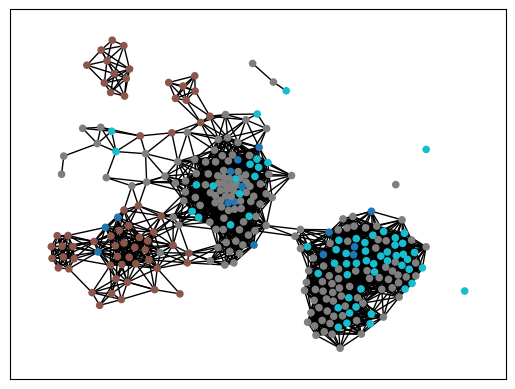

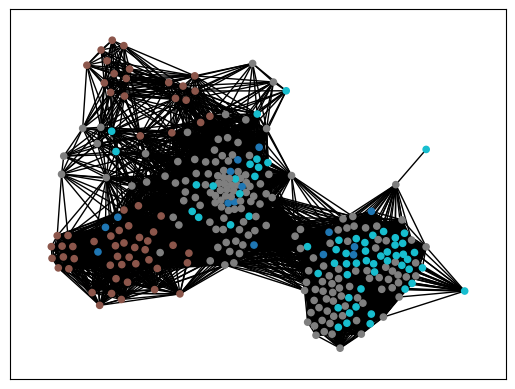

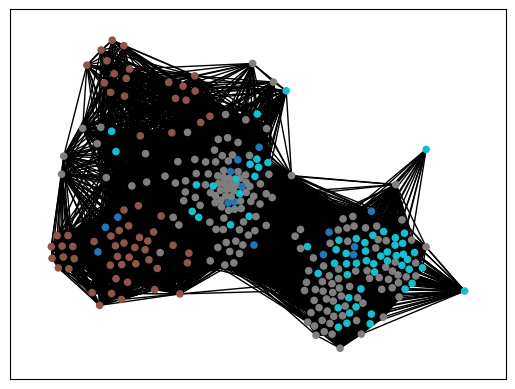

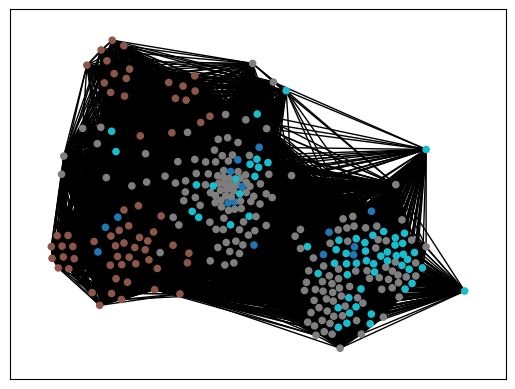

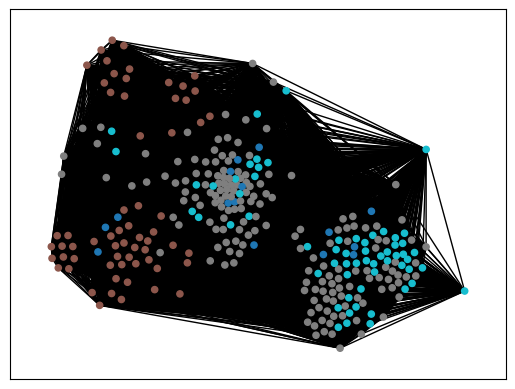

In [8]:
### Run the code below
eps_values = [0.01, 0.05, 0.1, 0.2, 0.4]

for eps in eps_values: 
    ax=plt.subplot()
    ax1=plt.subplot()
    G = nn_graph(X, eps)
    pos=nx.spring_layout(G)  
    nx.draw_networkx_edges(G, pos=X)
    nx.draw_networkx_nodes(G, pos=X, node_color=Y, node_size=20, cmap=plt.get_cmap('tab10'))
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    plt.show()


******************
When $\varepsilon$ increases, the more nodes are being intepreted as adjacent, thus increasing the connectivity of the graph.
******************

### Task 2.1.3 (2 points)
Assign to each edge in the $\varepsilon$-neighborhood graph a weight

$$W_{i j}=e^{-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{t}}$$

<span style='color: green'>**\[Implement\]**</span> the function ```weighted_nn_graph``` below that returns the weighted graph given the data matrix in input and the values eps and $t$, where $t$ is the parameter of the equation above. 

In [12]:
def weighted_nn_graph(data, eps=20, t=0.1):
    n = len(data)
    G = nx.Graph()
    ### YOUR CODE STARTS HERE
    G.add_nodes_from(range(n))

    L2 = lambda x, y: np.sum((x - y) ** 2)
    weigh = lambda d : np.exp(-d / t)
    dist = [[L2(X[i], X[j]) for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            if weigh(dist[i][j]) < eps:
                G.add_edge(i, j, weight=weigh(dist[i][j]))
                # G.add_edge(i, j)
    ### YOUR CODE ENDS HERE
    return G

### Task 2.1.4 (2 points)

Vary $t \in \{10, 0.1, 0.000001\}$. Plot the weights as a histogram using the code below in order to analyse the results using the provided code.</br>
What happens when $t$ is very small, close to $0$, i.e., $t \rightarrow 0$?</br> What happens when $t$ is very large?
</br>Is the behaviour with $t = 0$ expected?

<span style='color: green'>**\[Motivate\]**</span> your answer reasoning on the formula. 

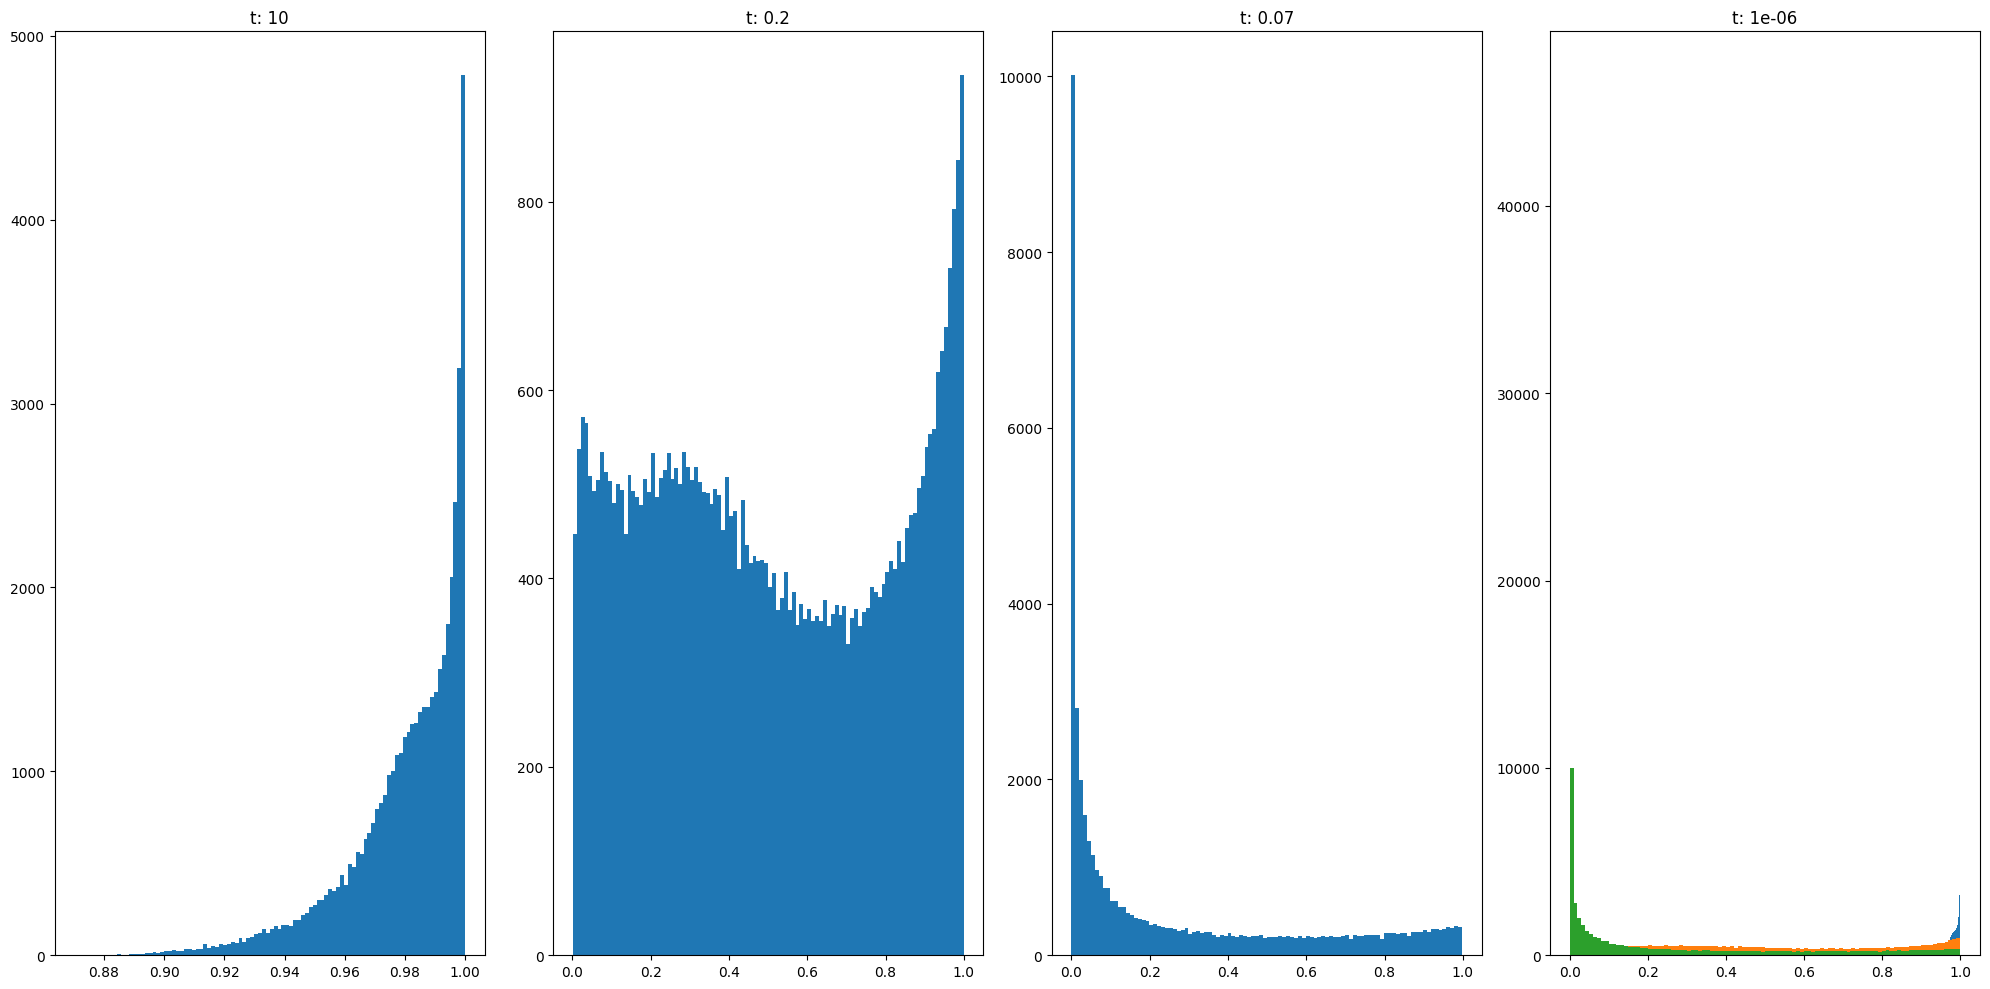

In [17]:
ts = [10, 0.2, 0.07, 0.000001]
fig, ax = plt.subplots(1,4, figsize=(20, 10))
row = 0

for i, t in enumerate(ts):
    G = weighted_nn_graph(X, eps=60, t=t)
    ys = []
    

    col = i 
    for i, d in enumerate(G.edges.data()):
        ys.append(d[2]['weight'])
    plt.hist(ys, bins=100)
    ax[col].hist(ys, bins=100)
    ax[col].set_title("t: "+str(t))
    
plt.tight_layout()

******************
- When $t$ is very small, close to 0, the weight $W_{ij}$ becomes very large for small $\left|\mathbf{x}{i}-\mathbf{x}{j}\right|^{2}$ values. This is because the exponential term in the formula approaches 1 for small values of $\left|\mathbf{x}{i}-\mathbf{x}{j}\right|^{2}$, making the weight almost equal to $\exp(1)\approx 2.718$, which is a very large value. Therefore, for small values of $t$, the weights become very large, leading to a highly connected graph.

- On the other hand, when $t$ is very large, the weight $W_{ij}$ becomes very small for all values of $\left|\mathbf{x}{i}-\mathbf{x}{j}\right|^{2}$. This is because the exponential term in the formula approaches 0 for large values of $\left|\mathbf{x}{i}-\mathbf{x}{j}\right|^{2}$, making the weight almost equal to 0. Therefore, for large values of $t$, the weights become very small, leading to a sparsely connected graph.

- If we set $t=0$, the weight $W_{ij}$ becomes 1 for all edges, regardless of the distance between the nodes. This is because $e^{-\frac{\left|\mathbf{x}{i}-\mathbf{x}{j}\right|^{2}}{t}}$ approaches 1 as $t$ approaches 0. Therefore, the behaviour with $t=0$ is expected.
******************

## Task 2.2: Spectral clustering (20 points)

We will now look at spectral clustering and its properties. <br>
For this Task we will use a subgraph from [malaria_genes](https://networks.skewed.de/net/malaria_genes). <br>
Note that this dataset is the biological network of the data used in Task 2.1. <br>

### Task 2.2.1 (5 point)
Run the code below to load and visualize the network. <br> 
By only observing the below plot and the $nn$-plots (nearest-neighbor plots)of task 2.1.2, which $\varepsilon$ values seems to better approximate the real network? (just think of the answer you don't have to write something)

In [ ]:
edgelist = read_edge_list('./data/edges.txt')
n = np.max(edgelist)+1
G = nx.Graph()
for i in range(n):
    G.add_node(i)
for edge in edgelist:
    G.add_edge(edge[0], edge[1])
pos=nx.spring_layout(G)  
nx.draw_networkx_edges(G,pos=X)
nx.draw_networkx_nodes(G, pos=X, node_color=Y, node_size=20, cmap=plt.get_cmap('tab10'))
plt.show()

Now you are having the real network, lets check how good $nn$-graph (and for which $\epsilon$ value) is a good "approximates"the real graph. <br> 

A) <span style='color: green'>**\[Implement\]**</span> a function that calculates the absolute edge difference between the real network $G$ and the one $\epsilon$-neighborhood graph. Note that in order to do that you have to follow two steps: 
1. In the first step you have to check if an edge in the real graph is also presented in the $nn$-graph, if not you increase the counter
2. In the second step you follow the opposite direction, that is you check if for every edge of the $nn$-graph if is also presented in the original one, if not you increase the counter. (Faster way just use the adjacency matrices) <br>

B) <span style='color: green'>**\[Implement\]**</span> Plot the edge-difference plot for the range of epsilon values in the range[0.01, 0.11] with step = 0.005. <br>
C) <span style='color: green'>**\[Motivate]**</span> By observing the plot it seems that there exists only one global minimum and no local minimum. Try to prove/disprove this intuition.

In [76]:
#A) YOUR CODE HERE

def abs_edge_diff(G, nn):
    counter = 0
    for i, j in G.edges():
        if (i, j) not in nn.edges():
            counter += 1
    for i, j in nn.edges():
        if (i, j) not in G.edges():
            counter += 1
    return counter

G_nn = nn_graph(X, 0.08333)
print(G)
print(G_nn)
print(abs_edge_diff(G, G_nn))

Graph with 307 nodes and 2812 edges
Graph with 307 nodes and 2811 edges
2409


21
[0.01, 0.060000000000000005, 0.11, 0.16000000000000003, 0.21000000000000002, 0.26, 0.31000000000000005, 0.36000000000000004, 0.41000000000000003, 0.46, 0.51, 0.56, 0.6100000000000001, 0.66, 0.7100000000000001, 0.76, 0.81, 0.8600000000000001, 0.91, 0.9600000000000001, 1.01]


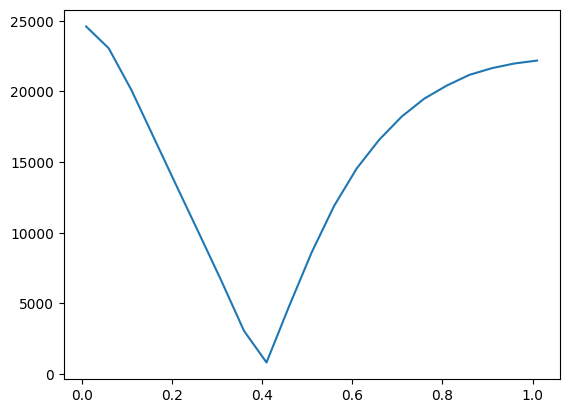

In [92]:
#B) YOUR CODE HERE

differences = []
epss = np.arange(0.01, 0.115, 0.005)
for eps in epss:
    G_nn = nn_graph(X, eps)
    diff = abs_edge_diff(G, G_nn)
    differences.append(diff)

plt.plot(epss, differences)
plt.show()



******************
It seems as though there are a global minimum around $\varepsilon = 0.07$. The y value of the curve increases again after $\varepsilon = 0.07$ and converges to a value after x = 1.

The plot is not completely smooth and concave with a clear global minimum in the range specified in the assignment. 
******************

### Task 2.2.2 (2 points)
Compute the eigenvectors and eigenvalues (using the provided function) of the Normalized Laplacian and the Random Walk Laplacian of the graph $G$.<br> 
Plot the spectrum (eigenvalues).

<span style='color: green'>**\[Implement\]**</span> the code to compute the different Laplacians. 

In [57]:
def graph_eig(L): 
    """
        Takes a graph Laplacian and returns sorted the eigenvalues and vectors.
    """
    lambdas, eigenvectors = np.linalg.eig(L)
    lambdas = np.real(lambdas)
    eigenvectors = np.real(eigenvectors)
    
    order = np.argsort(lambdas)
    lambdas = lambdas[order]
    eigenvectors = eigenvectors[:, order]
    
    return lambdas, eigenvectors

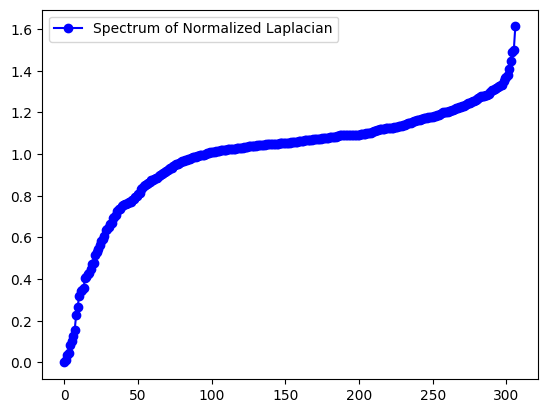

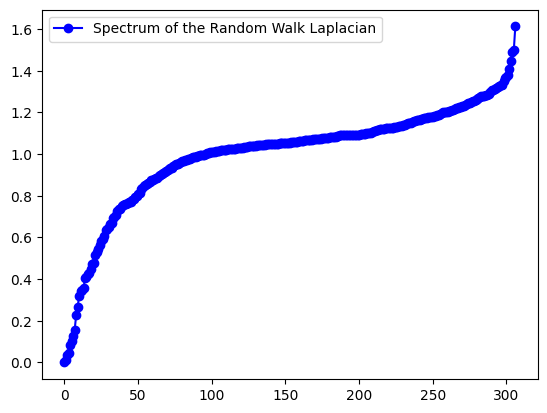

In [85]:
L_norm = None
L_rw = None

### YOUR CODE STARTS HERE
identity_matrix = np.identity(len(G.nodes()))
adjacency_matrix = nx.adjacency_matrix(G).toarray()
degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
inverse_sqrt_degree_matrix = np.linalg.inv(np.sqrt(degree_matrix))
laplacian_matrix = degree_matrix - adjacency_matrix

L_norm = inverse_sqrt_degree_matrix @ laplacian_matrix @ inverse_sqrt_degree_matrix
L_rw = identity_matrix - (np.linalg.inv(degree_matrix) @ adjacency_matrix)
### YOUR CODE ENDS HERE

eigval_norm, eigvec_norm = graph_eig(L_norm)
eigval_rw, eigvec_rw = graph_eig(L_rw)

plt.figure(0)
plt.plot(eigval_norm, 'b-o', label='Spectrum of Normalized Laplacian', )
plt.legend()
plt.figure(1)
plt.plot(eigval_rw, 'b-o', label='Spectrum of the Random Walk Laplacian')
plt.legend()

### Task 2.2.3 (4 points)
<span style='color: green'>**\[Implement\]**</span> the function ```spect_cluster``` that returns a vector ```y_clust``` in which each entry y_clust\[i\] represents the community assigned to node $i$. The method should be able to handle both the Normalized Laplacian, and the Random Walk Laplacian. You are allowed to use your implementation from the weekly exercises and ```sklearn.cluster.k_means``` for k-means clustering. 

In [ ]:
from sklearn.cluster import k_means

def spect_cluster(G, eig_type="normal", k=5, d=5):
    ### YOUR CODE STARTS HERE
    identity_matrix = np.identity(len(G.nodes()))
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    inverse_sqrt_degree_matrix = np.linalg.inv(np.sqrt(degree_matrix))
    laplacian_matrix = degree_matrix - adjacency_matrix

    L_norm = inverse_sqrt_degree_matrix @ laplacian_matrix @ inverse_sqrt_degree_matrix
    L_rw = identity_matrix - (np.linalg.inv(degree_matrix) @ adjacency_matrix)

    eigval_norm, eigvec_norm = graph_eig(L_norm)
    eigval_rw, eigvec_rw = graph_eig(L_rw)

    if eig_type == "normal":
        eigvec = eigvec_norm
    else:
        eigvec = eigvec_rw

    y_clust = k_means(eigvec[:, 1:d], k, n_init="auto")[1]
    
    
    
    ### YOUR CODE ENDS HERE
    return y_clust

In [ ]:
def plot_graph(G, clusters):
    plt.figure(1,figsize=(30,15))
    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, X, alpha=0.2)
    nc = nx.draw_networkx_nodes(G, X, nodelist=nodes, node_color=clusters, node_size=100, cmap=plt.cm.jet)

    plt.axis('off')
    plt.show()

your_clusters = spect_cluster(G, k=6)   
plot_graph(G, your_clusters)


### Task 2.2.4 (1 points)

Finally, use your implementation of spectral clustering with different Laplacians and different values of $k \in [2,7]$ and plot the results using the helper function ```plot_graph```. 

<span style='color: green'>**\[Describe\]**</span> the results you obtain. Especially, what is the difference between the Random Walk and the Normalized Laplacians, if any? How do you explain such differences? 

In [ ]:
for method in ['normal', 'random']: 
    for k in np.arange(2,8): 
        your_clusters = spect_cluster(G,eig_type=method, k=k)
        plot_graph(G, your_clusters)

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 2.2.5 (4 points)
<span style='color: green'>**\[Implement\]**</span> the modularity. Recall that the definition of modularity for a set of communities $C$ is
$$ 
Q=\frac{1}{2 m} \sum_{c \in C} \sum_{i \in c} \sum_{j \in c}\left(A_{i j}-\frac{d_{i} d_{j}}{2 m}\right) \qquad \qquad (1) 
$$
where $A$ is the adjacency matrix, and $d_i$ is the degree of node $i$

**Note**: Use ```plot_graph``` function in order to see for yourself if maximising modularity leads a better clustering. If you did not succeed with the previous Task, you are allowed to use [Scikit Learn Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

In [ ]:
def modularity(G, clustering):
    modularity = 0
    ### YOUR CODE STARTS HERE
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
    m = np.sum(adjacency_matrix)

    for i in range(len(clustering)):
        for j in range(len(clustering)):
            if clustering[i] == clustering[j]:
                modularity += adjacency_matrix[i][j] - (degree_matrix[i][i] * degree_matrix[j][j]) / (2 * m)
    
    
    modularity /= (2 * m)    
    ### YOUR CODE ENDS HERE
    return modularity

### Task 2.2.6 (2 points)

Compute the modularity of your Spectral Clustering Implementation for different values of $k$. 

<span style='color: green'>**\[Motivate\]**</span> Which $k$ value maximizes the modularity? From your perspective, does spectral clustering forms "clear" clusters for the best $k$ found by modularity? Using the spectral graph theory, why do you think this is/isn't the case? 

In [ ]:
mods = []
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for k in ks:
    clusters = spect_cluster(G, k=k) ### NOTE: If you do not use your implementation substitute with a call to the sklearn one. 
    mods.append(modularity(G, clusters))

# You may want to use plt.plot to plot the modularity for different values of k
plt.plot(ks, mods)
plt.show()
print(mods)

******************
When k=5, then the modularity maximises. The clusters of the graph with k=5 also look the most coherent and clear. The communities are not overlapping with each other. 
****************** 

### Task 2.2.7 (2 points)

<span style='color: green'>**\[Motivate\]**</span> There seems to be a relationship between graph embeddings and spectral clustering, can you guess that? _Hint_: Think to the eigenvectors of the graph's Laplacians. (1) Check the correct box below and (2) motivate your answer.

* [x] If the embeddings are linear and the similarity is the Laplacian, the embeddings we obtain minimizing the L_2 norm are equivalent to the eigenvectors of the Laplacian. 
* [x] If the embeddings are random-walk-based embeddings, the eigenvectors of the Random Walk Laplacian are related to the embeddings obtained by such methods. 
* [ ] The relationship is just apparent. 
* [ ] If the embeddings are linear and the similarity is the Adjacency matrix, the eigenvectors of the Laplacian are equivalent to the embeddings. 

<font color='red'>IMPORTANT: Do NOT just choose one answer. Please clarify WHY this is the correct answer.</font>

******************
If we are given the laplacian matrix $L = \Delta - A$. L is a symmetrix positive semidefinite matrix and this is used in spectral clustering. Here the nodes are assigned to cluseters based on their eigenvector value. 

If we use random-walk-based embeddings, then then we can look at the quantity of $x^TLx = \sum_{(u,v) \in E} (x_u-x_v)^2$. This quantity is used for minimizing the distance between the embeddings of the nodes, that are connected in the graph. These embeddings are equivalent to the eigenvectors of $L$ times some scalar.
In the quantity $x_u$ and $x_v$ are the coordinates of the eigenvectors $x$ corresponding to the vertices $u$ and $v$.
The eigenvector $x$ can be thought of as a one-dimensional embedding, that maps the vertices in the multidimensional space onto a real line.
******************

# Part 3: Link analysis
In this exercise, we will work with PageRank, Random Walks and their relationships with graph properties. 
We will use the most generic definition

$$\mathbf{r} = \alpha \mathbf{Mr} + (1-\alpha)\mathbf{p}$$

with $\mathbf{r}$ the PageRank vector, $\mathbf{M}$ the weighted transition matrix, and $\mathbf{p}$ the personalization vector. 
Additionally, let $n = |V|$, where $V$ is the nodes in the graph above.
Remember that in the case of PageRank the entries of the personalization vector are $p_i = 1/n$ for all $i$.  


## Task 3.1 Approximate PageRank (10 points)

### Task 3.1.1 (3 points)

<span style='color: green'>**\[Implement\]**</span>  a different algorithm for computing Personalized PageRank. This algorithm runs a fixed number of iterations and uses the definition of random walks. 
At each step, the algorithm either selects a random neighbor with probability $\alpha$ or returns to the starting node with probability $1-\alpha$. Every time a node is visited a counter on the node is incremented by one. Initially, each counter is 0. The final ppr value is the values in the nodes divided by the number of iterations. 

In [198]:
import random

'''
a different algorithm for computing Personalized PageRank. This algorithm runs a fixed number of iterations and uses the definition of random walks. 
At each step, the algorithm either selects a random neighbor with probability $\alpha$ or returns to the starting node with probability $1-\alpha$.
Every time a node is visited a counter on the node is incremented by one. Initially, each counter is 0. The final ppr value is the values in the nodes divided by the number of iterations. 
'''
def approx_personalized_pagerank(G, node, alpha = 0.85, iterations = 1000): 
    ppr = np.zeros(G.number_of_nodes())
    
    ### YOUR CODE STARTS HERE
    # Set the counter for the start node to 1
    ppr[node] = 1
    
    # Perform random walks for a fixed number of iterations
    for i in range(iterations):
        # Select a random neighbor with probability alpha
        if np.random.rand() < alpha:
            neighbors = G[node]
            node = np.random.choice(neighbors)
        # Return to the starting node with probability 1-alpha
        else:
            node = node
        
        # Increment the counter for the current node
        ppr[node] += 1
    
    # Compute the final Personalized PageRank values
    ppr = ppr / iterations
    ### YOUR CODE ENDS HERE
    return ppr

### Task 3.1.2 (3 points)

Run the ```approx_personalized_pagerank``` with default $\alpha$ and iterations $\{10, n, 2n, 4n, 100n, 1000n\}$ where $n$ is the number of nodes in the graph and starting node the node with the highest PageRank computed in Task 3.1.2.

<span style='color: green'>**\[Motivate\]**</span> what you notice as the number of iterations increase. Why are the values and the top-10 nodes ranked by PPR changing so much? 

In [ ]:
edgelist = read_edge_list('./data/edges.txt')
n = np.max(edgelist)+1
G = nx.Graph()
for i in range(n):
    G.add_node(i)
for edge in edgelist:
    G.add_edge(edge[0], edge[1])

pr = nx.pagerank(G)
starting_node = max(pr, key=pr.get)

for i, iterations in enumerate([10, G.number_of_nodes(), G.number_of_nodes()*2, G.number_of_nodes()*4, G.number_of_nodes()*100, G.number_of_nodes()*1000]):
    r = approx_personalized_pagerank(G, starting_node, iterations = iterations)
    r[starting_node] = 0
    r_sorted = np.argsort(r)[::-1]
    r_values = np.sort(r)[::-1]
    print(f'Iteration {iterations}: top-10 r={r_sorted[:10]}\n top-10 values={r_values[:10]}\n')

rr = nx.pagerank(G, alpha=0.85, personalization = {starting_node: starting_node})
rr[starting_node] = 0
r=np.zeros(len(rr))
for k in rr: r[k] = rr[k]
r_sorted = np.argsort(r)[::-1]
r_values = np.sort(r)[::-1]
print(f'top-10 r={r_sorted[:10]}\n top-10 values={r_values[:10]}\n')

******************
When observing the output of the algorithm, the top-10 nodes ranked by PPR changes because the algorithm is gradually improving its estimations for each nodes in the longest path increases. At first the top-10 nodes are what's reachble from the starting node and the algorithm is still exploring the graph. Later, the ranking seems to be more converged to a fixed set of numbers. Finally the top-10 nodes changes produced by nx.pagerank seems to differ somewhat.
******************

### Task 3.1.3 (2 points)

Compare the 5 nodes with the highest PPR obtained from ```nx.pagerank(G, alpha=0.85, personalization={node_highest_pagerank: 1})``` and the one obtained by the approximation. 

<span style='color: green'>**\[Describe\]**</span> the differences. Does the number of iterations affect the results? Is there a relationship between the number of iterations and the results? Is there a relationship between the approximated value of PageRank and the real value? Do you notice anything as the number of iteration increases? 

In [ ]:
k = 5
ppr_nx = nx.pagerank(G, alpha=0.85, personalization = {starting_node: 1})
r_nx = [0 for _ in range(G.number_of_nodes())]
for k, v in ppr_nx.items():
    r_nx[k] = v
r_est = approx_personalized_pagerank(G, starting_node, alpha=0.85)

topk_nx = np.argsort(r_nx)[-5:]
topk_est = np.argsort(r_est)[-5:]

print(topk_nx, topk_est)

for iterations in [10, G.number_of_nodes(), G.number_of_nodes()*2, G.number_of_nodes()*4, G.number_of_nodes()*100, G.number_of_nodes()*1000]:
    print(f'Number of iterations {iterations}')
    ppr_nx = nx.pagerank(G, alpha=0.85, personalization = {starting_node: 1})
    r_nx = [0 for _ in range(G.number_of_nodes())]
    for k, v in ppr_nx.items():
        r_nx[k] = v
    r_est = approx_personalized_pagerank(G, starting_node, iterations = iterations, alpha=0.85)
    print(f'Approximate PPR: {r_est[:10]}')
    print(f'Real PPR: {r_nx[:10]}')
    
    
    topk_nx = np.argsort(r_nx)[-5:]
    topk_est = np.argsort(r_est)[-5:]

    print(f"Topk of nx.pagerank: {topk_nx}, Topk of our estimation {topk_est}, Size of intersection: {len(set(topk_nx).intersection(set(topk_est)))}")

*****************
In the first two iterations there is no overlap. In the next two iterations there is one overlap and in the last two, there are 4 overlaps.

It seems as though the algorithm needs some time to learn the shape of the graph and visit all nodes and then the two versions of pagerank agrees at least on 4/5 of the nodes, when the algorithm converges.
*****************

### Task 3.1.4 (2 points)

Run again the same experiment but this time use $\alpha = 0.1$. 

<span style='color: green'>**\[Motivate\]**</span> Motivate whether and why you need more or less iterations to predict the 5 nodes with the highest PPR.

In [ ]:
for iterations in [10, G.number_of_nodes(), G.number_of_nodes()*2, G.number_of_nodes()*4, G.number_of_nodes()*100]:
    ppr_nx = nx.pagerank(G, alpha=0.1, personalization = {starting_node: 1})
    r_nx = [0 for _ in range(G.number_of_nodes())]
    for k, v in ppr_nx.items():
        r_nx[k] = v
    r_est = approx_personalized_pagerank(G, starting_node, iterations = iterations, alpha=0.1)

    topk_nx = np.argsort(r_nx)[-5:]
    topk_est = np.argsort(r_est)[-5:]

    print(f"Topk of nx.pagerank: {topk_nx}, Topk of our estimation {topk_est}, Size of intersection: {len(set(topk_nx).intersection(set(topk_est)))}")
    

*****************
At first there is an overlap but in the end there is no overlap. I think this might be caused by the probability for restart becomes so low. And when the page_rank estimation resets, it just explores the nodes close by eventhough there is a tiny probability of exploring the complete graph. 
*****************

## Task 3.2 Spam and link farms (12 points)

We will now study the effect of spam in the network and construct a link farm. In this part, if you want to modify the graph, use a copy of the original graph every time you run your code, so that you do not keep adding modifications.

In [ ]:
edgelist = read_edge_list('./data/edges.txt')
n = np.max(edgelist)+1
G2 = nx.Graph()
for i in range(n):
    G2.add_node(i)
for edge in edgelist:
    G2.add_edge(edge[0], edge[1])
G = G2.copy()

### Task 3.2.1 (3 points)
Based on the analysis in the slides, construct a spam farm $s$ on the graph $G$ with $T$ fake nodes. Assume that $s$ manages to get links from node 1. With $\alpha=0.5$, 

<span style='color: green'>**\[Describe\]**</span> which is the minimum number of pages $T$ that we you need to add in order to get $s$ being assigned the highest PageRank?

Graph with 8 nodes and 10 edges


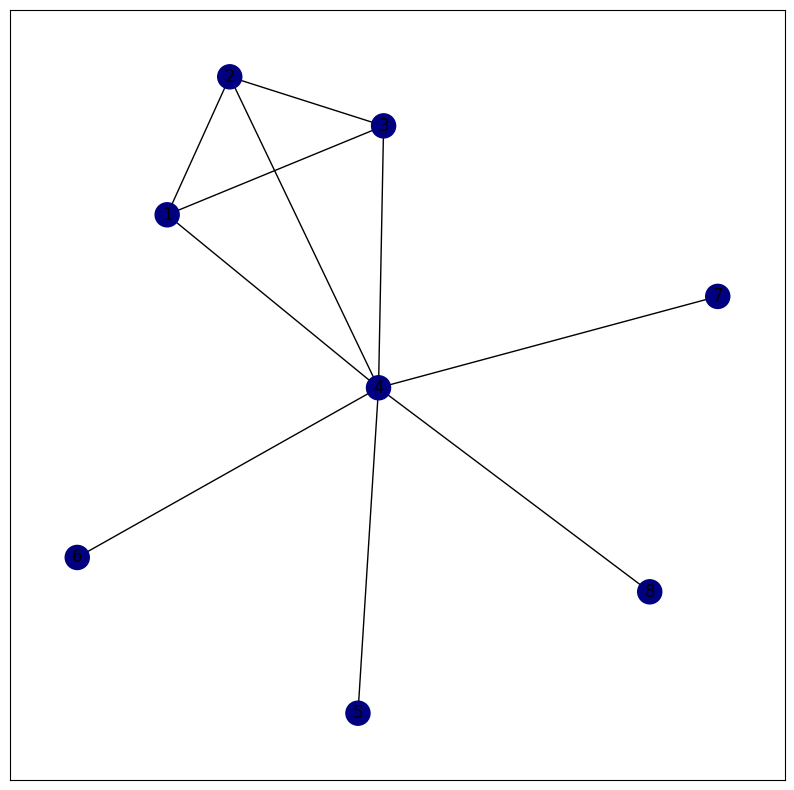

In [31]:
#CODE HERE IF YOU NEED THAT

# Construct a spam farm s on the graph G with T fake nodes. Assume that s manages to get links form node 1. With alpha = 0.5
def construct_spam_farm(G, T, alpha = 0.5):
    n = G.number_of_nodes()
    G.add_node(n)
    G.add_edge(1, n)
    for i in range(T):
        G.add_node(n+i+1)
        G.add_edge(n+i+1, n)
        if random.random() > alpha:
            G.add_edge(n+i+1, 1)
        
    return G

# # Construct a spam farm s on the graph G with T fake nodes. Assume that s manages to get links form node 1. With alpha = 0.5
# G1 = nx.graph.Graph()
# G1.add_node(1)
# G1.add_node(2)
# G1.add_node(3)
# G1.add_node(4)

# G1.add_edge(1, 2)
# G1.add_edge(1, 3)
# G1.add_edge(1, 4)
# G1.add_edge(2, 3)
# G1.add_edge(2, 4)
# G1.add_edge(3, 4)


# print(spam_farm)
# clusters = [0 for _ in range(spam_farm.number_of_nodes())]

# for i

def find_T_value(G, T, alpha=0.5):
    n = G.number_of_nodes()
    G.add_node(n)
    G.add_edge(1, n)
    for i in range(T):
        G.add_node(n+i+1)
        G.add_edge(n+i+1, n)
        if random.random() > alpha:
            G.add_edge(n+i+1, 1)
        pr = pagerank(G, 0.85)
        max_rank = np.argmax(pr)
        if max_rank == n:
            return i
    return n

def plot_spam_farm(spam_farm):
    plt.figure(figsize=(10, 10))
    nx.draw_networkx(spam_farm, with_labels=True, node_color=clusters, cmap=plt.cm.jet)
    plt.show()

# plot_spam_farm(spam_farm)

******************
A spam farm is a set of nodes, that has a large out degree but a low in degree. They are used to increase the pagerank of other nodes, that does not have a high pagerank themselves, thus increases their popularity by adding more nodes pointing to them.
Them spam nodes do not have a high pagerank themselves. 

A way to construct a spam farm of T nodes to a graph is to add T new nodes and for each of these nodes add edges to the desired sides, which should be increased.

The minimum number of spam nodes T, that points to s in order to make s have the highest pagerank is to find the node with the highest pagerank and its indegree $max_in$ and then set $T = max_{in} + 1$

******************

### Task 3.2.2 (3 points)
In the above scenario, assume that $T = \frac{1}{5}$ of the nodes in the original graph. 

<span style='color: green'>**\[Motivate\]**</span> what value of $\alpha$ will maximize the PageRank $\mathbf{r}_s$ of the link farm $s$. Provide sufficient justification for your choice.

******************
The value of $\alpha$ that maximizes $r_s$ is as close to 1 as possible. <br>
This is due to the fact that we have the formula: $y = \frac{x}{1-\alpha^2}+ \frac{\alpha}{1+\alpha}\frac{T}{n}$.<br>
That means if alpha goes to 1, then $\frac{x}{1-\alpha^2}$ goes to infinity and $\frac{\alpha}{1+\alpha}\frac{T}{n}$ goes to $\frac{1}{2}\frac{T}{n}$
******************

### Task 3.2.3 (3 points)

Now we fix both $\alpha = 0.5$ and $T = \frac{1}{5}n$. 

<span style='color: green'>**\[Implement\]**</span>  ```trusted_pagerank``` the method for spam mass estimation.

In [71]:
def trusted_pagerank(G, trusted_indices, iterations=1000, alpha=0.5):
    r = None
    ### YOUR CODE STARTS HERE
    ppr = np.zeros(G.number_of_nodes())

    ### YOUR CODE STARTS HERE
    # Set the counter for the start node to 1
    node = 0
    ppr[node] = 1

    # Perform random walks for a fixed number of iterations
    for i in range(iterations):
        # Select a random neighbor with probability alpha
        if np.random.rand() < alpha:
            neighbors = G[node]
            node = np.random.choice(neighbors)
        # Return to the starting node with probability 1-alpha
        else:
            node = np.random.choice(trusted_indices)

        # Increment the counter for the current node
        ppr[node] += 1

    # Compute the final Personalized PageRank values
    r = ppr / iterations

    return r

def spam_mass(G, trusted_indices, iterations=10, alpha=0.5):
    r_x = pagerank(G, alpha=alpha)
    r_x_plus = trusted_pagerank(G, trusted_indices, iterations=iterations, alpha=alpha)
    r_x_minus = r_x - r_x_plus
    return r_x / r_x_minus

G = nx.Graph()
G.add_edges_from(edgelist)
trusted_pagerank(G, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], iterations=1000, alpha=0.5)

spam_mass_est = spam_mass(G, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], iterations=1000, alpha=0.5)

cleaned_graph = G.copy()
for node in G.nodes():
    if spam_mass_est[node] > 1:
        cleaned_graph.remove_node(node)

print(cleaned_graph.number_of_nodes())



272


### Task 3.2.4 (3 points)

<span style='color: green'>**\[Motivate\]**</span> whether we are able to detect the node $s$, if the trusted set of nodes is a random sample $10\%$ of the nodes in the original graph. 
If not, what could be a viable solution? Which nodes would you rather choose as trusted?

You are not obliged to, but you can write some helper code to reach the answer faster.  

_Hint_: Remember the spam mass formula in the Link Analysis lecture

In [32]:
### YOUR CODE HERE
Ts = []
print(G)
for i in range(1, 50):
    spam_farm = G.copy()

    Ts.append(find_T_value(spam_farm, i, ))

print(Ts)
print(np.min(Ts))


Graph with 307 nodes and 2812 edges
[307, 307, 307, 307, 307, 307, 4, 7, 6, 7, 6, 9, 6, 7, 9, 6, 9, 6, 7, 7, 6, 6, 6, 6, 6, 9, 7, 6, 6, 6, 4, 7, 6, 6, 5, 7, 5, 4, 4, 6, 7, 7, 7, 6, 6, 7, 6, 5, 6]
4


*******************

If we assume that the trusted nodes in the graph contain all the information necessary to detect $s$, then we can use the PageRank algorithm to determine the importance of each node in the trusted set. We can then check whether node $s$ has a high enough PageRank score to be considered important.

However, if the trusted set of nodes is only a random sample of $10\%$ of the nodes in the original graph, it is unlikely that the trusted set contains all the necessary information to detect $s$. In this case, a viable solution would be to select a more targeted set of trusted nodes that are more likely to contain the information necessary to detect $s.

We build some code, that is able to detect weather $s$ is the has the highest rank in the pagerank of the spam farm including s. We found that The minimum value we found was T = 4, where we could detect $s$ as the most important node.

******************

# Part 4: Graph embeddings (19 points)
In this final part, we will try a different approach for clustering the data from above. 
The strategy is going to be the following:

1. Use VERSE [[1]](https://arxiv.org/pdf/1803.04742.pdf) to produce embeddings of the nodes in the graph.
2. Use K-Means to cluster the embeddings. Measure and report NMI for the clustering. 

[[1](https://arxiv.org/pdf/1803.04742.pdf)] Tsitsulin, A., Mottin, D., Karras, P. and Müller, E., 2018, April. Verse: Versatile graph embeddings from similarity measures. In Proceedings of the 2018 World Wide Web Conference (pp. 539-548).

In [ ]:
G = email.S_dir.copy()

## Task 4.1.1 (6 points)

<span style='color: green'>**\[Implement\]**</span> the methods below to compute sampling version of VERSE. _Hint:_ it might be a help to look in the original article \[1\] above.

In [ ]:
def sigmoid(x):
    ''' Return the sigmoid function of x 
        x: the input vector
    '''
    ### YOUR CODE STARTS HERE
    x = 1/(1+np.exp(-x))
    ### YOUR CODE ENDS HERE
    return x

def pagerank_matrix(G, alpha = 0.85) :
    ''' Return the Personalized PageRank matrix of a graph

        Args:
            G: the input graph
            alpha: the dumping factor of  PageRank

        :return The nxn PageRank matrix P
    '''
    ### YOUR CODE STARTS HERE
    n = G.number_of_nodes()
    # P = np.zeros((n, n))
    adj_matrix = nx.adjacency_matrix(G)
    # degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
    degree_inv_matrix = np.diag(1/np.sum(adj_matrix, axis=1))
    # L = degree_matrix - adj_matrix
    # P = np.linalg.inv(degree_matrix) @ L
    # P = alpha * P + (1-alpha) * np.ones((n, n))/n
    I = np.diag(np.ones(G.number_of_nodes()))
    P = (1-alpha)*I @ np.linalg.inv(I - alpha * adj_matrix @ degree_inv_matrix)

    ### YOUR CODE ENDS HERE
    return P


def update(u, v, Z, C, step_size) :
    '''Update the matrix Z using row-wise gradients of the loss function

       Args:
            u : the first node
            v : the second node
            Z : the embedding matrix
            C : the classification variable used in Noise Contrastive estimation indicating whether the sample is positive or negative
            step_size: step size for gradient descent


       :return nothing, just update rows Z[v,:] and and Z[u,:]
    '''
    ### YOUR CODE STARTS HERE
    Z[v,:] = Z[v,:] - step_size * (sigmoid(np.dot(Z[v,:], Z[u,:])) - C) * Z[u,:]
    Z[u,:] = Z[u,:] - step_size * (sigmoid(np.dot(Z[v,:], Z[u,:])) - C) * Z[v,:]
    ### YOUR CODE ENDS HERE


def verse(G, S, d, k = 3, step_size = 0.0025, steps = 10000):
    ''' Return the sampled version of VERSE

        Args:
            G: the input Graph
            S: the PageRank similarity matrix
            d: dimension of the embedding space
            k: number of negative samples
            step_size: step size for gradient descent
            steps: number of iterations

        :return the embedding matrix nxd
    '''
    n = G.number_of_nodes()
    Z = 1/d*np.random.rand(n,d)

    ### YOUR CODE STARTS HERE
    for i in range(steps):
        u = np.random.randint(n)
        v = np.random.choice(n, p=S[u])
        if u == v:
            continue
        if G.has_edge(u, v):
            update(u, v, Z, 1, step_size)
        else:
            update(u, v, Z, 0, step_size)
            for j in range(k):
                v = np.random.randint(n)
                if G.has_edge(u, v):
                    update(u, v, Z, 0, step_size)

    ### YOUR CODE ENDS HERE
    return Z

In [35]:
# This code runs the `verse` algorithm above on G and stores the embeddings to 'verse.npy'
P   = pagerank_matrix(G).T
emb = verse(G, P, 128, step_size=0.0025, steps=10_000)
np.save('verse.npy', emb)

### Task 4.1.2 (3 points)

<span style='color: green'>**\[Implement\]**</span> a small piece of code that runs $k$-means on the embeddings with $k \in [2,7]$ to evaluate the performance compared to Spectral clustering using the NMI as measure. You can use ```sklearn.metrics.normalized_mutual_info_score``` for the NMI and ```sklearn.cluster.KMeans``` for kmeans. In both cases, you can use your own implementation from Handin 1 or the exercises, but it will not give you extra points.  

<span style='color: green'>**\[Describe\]**</span> which of the method performs the best and whether the results show similarities between the two methods

[[ 1.03797819e-03  4.36251032e-03  9.21500767e-04 ...  5.49865087e-03
  -1.30858018e-05  1.03053553e-04]
 [ 5.15556623e-03  1.61398299e-03  2.14686775e-03 ...  6.41381967e-03
  -1.33894765e-04  3.13174349e-03]
 [ 1.49981944e-03  2.88464660e-03  7.21060249e-03 ...  3.40712034e-03
   4.88494091e-03  5.52938738e-03]
 ...
 [ 3.74354271e-03  2.85003176e-03  3.83335885e-03 ...  7.01181328e-03
   6.09992001e-04  1.19278260e-03]
 [ 4.94740741e-03 -1.21603590e-04  1.74203673e-03 ... -4.13624738e-06
   4.23931209e-03  4.29555597e-03]
 [ 5.17052200e-03  1.88579534e-03  4.36433050e-04 ...  6.65588287e-05
   4.29221767e-03  5.89357318e-03]]


c:\Users\Simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\Simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received contin

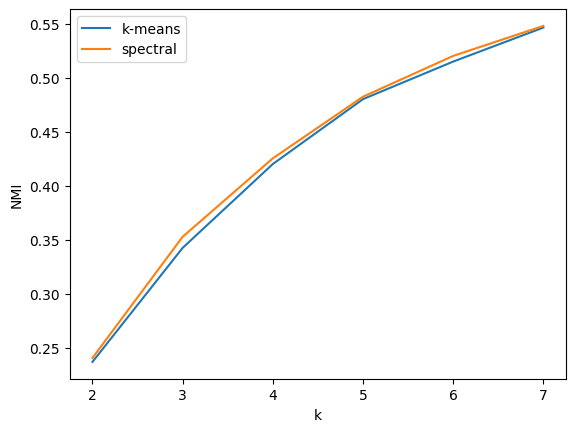

In [62]:
### YOUR CODE STARTS HERE

import sklearn as sk

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
# Load the embeddings from file
embeddingsT = np.array(np.load('verse.npy')).T
embeddings = np.array(np.load('verse.npy'))
print(embeddings)

# Define the range of k
k_range = range(2, 8)

scores = []

for k in k_range:
    # Perform k-means clustering for each k in the range
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(embeddings)
    # nmi = normalized_mutual_info_score(np.mean(embeddingsT, axis = 0), kmeans_labels)

    # Perform spectral clustering for each k in the range
    spectral = SpectralClustering(n_clusters=k, random_state=42)
    spectral_labels = spectral.fit_predict(embeddings)
    nmi = normalized_mutual_info_score(spectral_labels, kmeans_labels)
    # spectral_nmi = normalized_mutual_info_score(np.mean(embeddingsT, axis=0), spectral_labels)
    scores.append(nmi)


# Plot the scores
plt.plot(k_range, scores, label='nmi')
plt.xlabel('k')
plt.ylabel('NMI')
plt.legend()
plt.show()


*******************
From the plot of the NMI scores, we can see that both spectral clustering and k-means clustering perform similarly overall, with the NMI scores generally increasing as the number of clusters (k) increases. However, k-means clustering tends to perform slightly better than spectral clustering for smaller values of k, while spectral clustering tends to perform better for larger values of k. 

It seems as though spectral clustering is performing better than k-means after having 5 clusters, where they result of KMeans and spectral clustering has the highest NMI score at 0.175 at k = 5.

******************

### Task 4.1.3 (2 points)

<span style='color: green'>**\[Motivate\]**</span> how you would conceptionally expand the way of embedding a graph, if you had a multi-label-graph. E.g. meaning you have multiple labels and each edge needs to have exacrly one of those. So you can also have multiple edges between the same nodes, as long as they have different labels.

*******************
We could expand the way we embed the graph to a multi-label-graph by creating an embedding of each label of between the nodes in the graph. Then we could concatenate the embeddings and calculate a mean of the embeddings of all the adjacent nodes for a node. This will give us a single vector representation for the node that captures the information about the different labels of its adjacent nodes. 
******************

## Task 4.2 (8 points)

**This is a hard exercise. Do it for fun or only if you are done with easier questions.**

<span style='color: green'>**\[Implement\]**</span> a new GCN that optimizes for modularity. The loss function takes in input a matrix $C \in \mathbb{R}^{n\times k}$ of embeddings for each of the nodes. 
$C$ represents the community assignment matrix, i.e. each entry $C_{ij}$ contains the probability that node $i$ belong to community $j$. 

The loss function is the following
$$
loss = - Tr(C^\top B C) + l\|C\|_2
$$ 
where $B$ is the modularity matrix that you will also implement, and $l$ is a regularization factor controlling the impact of the $L_2$ regularizer. 
We will implement a two-layer GCN similar to the one implemented in the exercises, but the last layer's activation fucntion is a Softmax. 

In [ ]:
import pykeen

# Adjacency matrix
G     = email.S_undir.copy()
A     = np.array(nx.adjacency_matrix(G, weight=None).todense())
I     = np.eye(A.shape[0])
A     = A + I # Add self loop

# Degree matrix
### YOUR CODE HERE

# Normalized Laplacian
Delta_inv = np.linalg.inv(np.diag(np.sum(A, axis=1)))
L = Delta_inv @ A
L = Delta_inv @ L @ Delta_inv
    
# Create input vectors
# X = A
X = np.zeros((G.number_of_nodes(), 2))
X[:, 0] = np.sum(A, axis=1)
X[:, 1] = np.sum(L, axis=1)


### TODO your code here

X = torch.tensor(X, dtype=torch.float, requires_grad=True) # Indicate to pytorch that we need gradients for this variable
As = torch.tensor(A, dtype=torch.float)
L = torch.tensor(L, dtype=torch.float)  # We don't need to learn this so no grad required.

In [ ]:
# Define a GCN
class GCNLayer(nn.Module):
    def __init__(self, L, input_features, output_features, activation=F.relu):
        """
            Inputs:
                L:               The "Laplacian" of the graph, as defined above
                input_features:  The size of the input embedding
                output_features: The size of the output embedding 
                activation:      Activation function sigma
        """
        super().__init__()
        
        ### TODO Your code here
        self.L = L
        self.input_features = input_features
        self.output_features = output_features
        self.activation = activation
        self.W =  nn.Parameter(torch.randn(input_features, output_features))
        self.b = nn.Parameter(torch.randn(output_features))
        ### TODO Your code here
     
    def forward(self, X):
        ### TODO Your code here
        # X = torch.mm(X, self.W) + torch.mm(torch.mm(L, X), self.b)
        X = torch.matmul(self.L, X)
        X = torch.matmul(X, self.W) + self.b

        if self.activation is not None:
            X = self.activation(X)
        ### TODO Your code here
        return X

Define the modularity matrix and the modularity loss

In [ ]:
def modularity_matrix(A):
    B = None
    ### YOUR CODE HERE
    A = A.clone().detach()
    degrees = torch.sum(A, axis=1)
    m = torch.sum(degrees) / 2.0
    expected_edges = torch.outer(degrees, degrees) / (2.0 * m)
    B = A - expected_edges
    ### YOUR CODE HERE
    return B.clone().detach()

def modularity_loss(C, B, l = 0.01): 
    ''' Return the modularity loss

        Args:
            C: the node-community affinity matrix
            B: the modularity matrix
            l: the regularization factor
            
        :return the modularity loss as described at the beginning of the exercise
    '''
    loss = 0
    ### YOUR CODE HERE
    cbc = torch.trace(torch.mm(torch.mm(C.T, B), C))
    regularized_c = l*torch.norm(C)
    loss = -(cbc - regularized_c)
    ### YOUR CODE HERE
    return loss

Compute labels from communities

In [ ]:
### Compute labels from communities
labels = None
### YOUR CODE HERE
labels = email.communities

# communities = nx.community.centrality.girvan_newman(G)
# comminity_labels = [np.array(list(com)) for com in next(communities)]
# comminity_labels = [list(x) for x in comminity_labels]

# def get_labels_from_communities(comminity_labels, n):
#     c_labels = []
#     i_s = []
#     for i in range(0, n + 1):
#         for j in range(0, len(comminity_labels)):
#             for k in range(0, len(comminity_labels[j])):
#                 if(comminity_labels[j][k] == i):
#                     c_labels.append(j)
#                     i_s.append(i)
#     return c_labels

# true_labels = get_labels_from_communities(comminity_labels, G.number_of_nodes())

# def show_graph(G, labels):
#     plt.figure(figsize=(10, 10))
#     pos = nx.spring_layout(G)
#     nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.Set1, node_color=labels)
#     nx.draw_networkx_edges(G, pos, alpha=0.3)
#     plt.show()

# # show_graph(G, true_labels)
# labels = torch.tensor(true_labels, dtype=torch.long)
### YOUR CODE HERE


Create the model

In [277]:
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Encode the labels with one-hot encoding
def to_categorical(y):
    """ 1-hot encodes a tensor """
    num_classes = np.unique(y).size
    return np.eye(num_classes, dtype='uint8')[y]

def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

y, classes = encode_label(labels)
y = torch.tensor(y)

# Define convolutional network
in_features, out_features = X.shape[1], classes.size # output features as many as the number of classes
hidden_dim = 16

# Stack two GCN layers as our model
# nn.Sequential is an implicit nn.Module, which uses the layers in given order as the forward pass
gcn = nn.Sequential(
    GCNLayer(L, in_features, hidden_dim, F.relu),
    GCNLayer(L, hidden_dim, out_features, None),
    nn.Softmax(dim=1)
)
gcn.to(device)

Sequential(
  (0): GCNLayer()
  (1): GCNLayer()
  (2): Softmax(dim=1)
)

Train the unsupervised model once 

In [278]:
l = 100
epochs = 2000

model = GCNLayer(X, in_features, out_features, F.relu)

def train_model(model, optimizer, X, B, epochs=100, print_every=100, batch_size = 2):
    for epoch in range(epochs+1):
        y_pred = model(X)
        loss = modularity_loss(y_pred, B, l=l)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % print_every == 0:
            print(f'Epoch {epoch:2d}, loss={loss.item():.5f}')

B = modularity_matrix(As)
optimizer = torch.optim.Adam(gcn.parameters(), lr=0.01)
train_model(gcn, optimizer, X, B, epochs=epochs, print_every=100)

AttributeError: 'GCNLayer' object has no attribute 'propagate'

Evaluate your model using NMI. Since the initialization is random train the model 10 times and take the average NMI. Assign each node to the community with the highest probability. 
You should obtain an Average $\text{NMI}\approx0.5$.

Plot the last graph with the nodes colored by commnitieis communities using ```plot_graph``` below. 

**Note**: You have to create the model 5 times otherwise you are keeping training the same model's parameters! 

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

def plot_graph(G, y_pred): 
    plt.figure(1,figsize=(15,5))
    pos = nx.spring_layout(G)
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=y_pred, node_size=100, cmap=plt.cm.jet)
    plt.axis('off')
    plt.show()


    
### YOUR CODE STARTS HERE 
y_pred = gcn(X)
y_pred = y_pred.detach().numpy()
y_pred = np.argmax(y_pred, axis=1)
plot_graph(G, y_pred)
print(f'NMI: {normalized_mutual_info_score(labels, y_pred)}')
### YOUR CODE ENDS HERE